In [1]:
from pybaseball import statcast
import pandas as pd

# Fetch complete dataset for the specified date range
statcast_data = statcast(start_dt="2023-03-31", end_dt="2024-05-13")

# Save the dataset to a CSV file
statcast_data.to_csv('complete_statcast_data.csv', index=False)


This is a large query, it may take a moment to complete


c:\Users\RaymondCarpenter\AppData\Local\Programs\Python\Python39\lib\site-packages\pybaseball\statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)


Skipping offseason dates


  0%|          | 0/290 [00:00<?, ?it/s]c:\Users\RaymondCarpenter\AppData\Local\Programs\Python\Python39\lib\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
  0%|          | 1/290 [00:05<24:33,  5.10s/it]c:\Users\RaymondCarpenter\AppData\Local\Programs\Python\Python39\lib\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
  1%|          | 2/290 [00:05<12:31,  2.61s/it]c:\Users\RaymondCarpenter\AppData\Local\Programs\Python\Python39\lib\site-packages\pybase

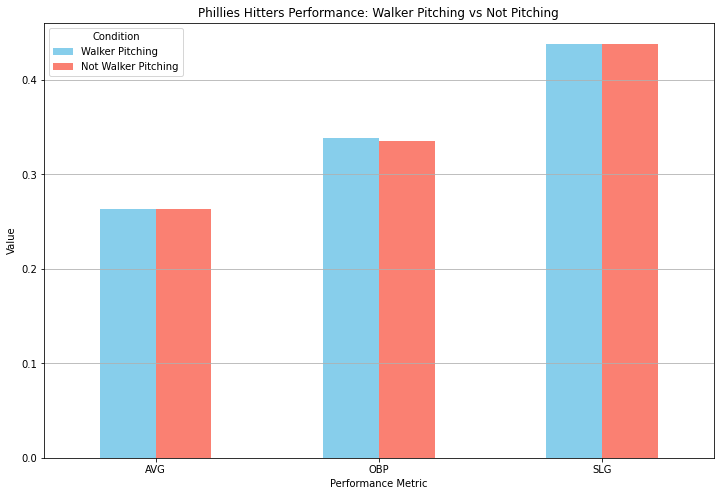

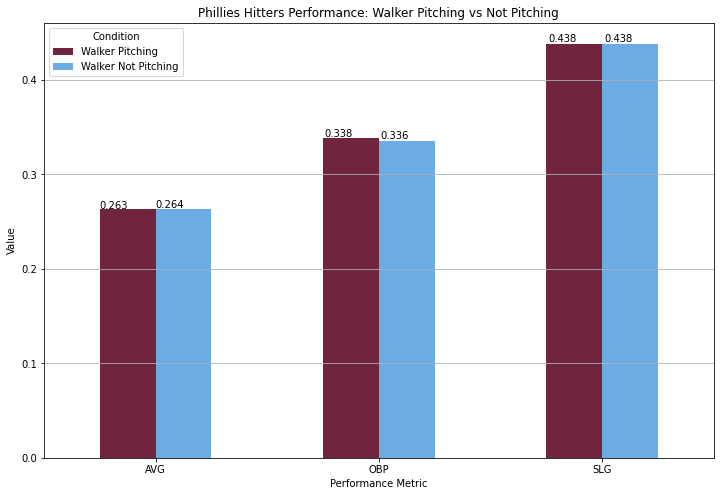

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the complete dataset
complete_file_path = 'C:/Users/RaymondCarpenter/Documents/GitHub/14thstreetanalytics/baseball/complete_statcast_data.csv'
complete_data = pd.read_csv(complete_file_path)

# Convert game_date to datetime
complete_data['game_date'] = pd.to_datetime(complete_data['game_date'])

# Identify game IDs where Taijuan Walker is pitching
walker_game_ids_complete = complete_data[complete_data['player_name'] == 'Walker, Taijuan']['game_pk'].unique()

# Identify Phillies batters based on home and away games
phillies_batter_ids = complete_data[(complete_data['home_team'] == 'PHI') | (complete_data['away_team'] == 'PHI')]['batter'].unique()

# Filter for Phillies hitters in games where Walker is pitching
phillies_batters_walker_games_complete = complete_data[(complete_data['game_pk'].isin(walker_game_ids_complete)) & 
                                                       (complete_data['batter'].isin(phillies_batter_ids))]

# Filter for Phillies hitters in games where Walker is not pitching
phillies_batters_non_walker_games_complete = complete_data[(~complete_data['game_pk'].isin(walker_game_ids_complete)) & 
                                                           (complete_data['batter'].isin(phillies_batter_ids))]

# Function to calculate metrics
def calculate_metrics(df):
    hits = df[df['events'].isin(['single', 'double', 'triple', 'home_run'])]
    total_bases = hits['events'].apply(lambda x: 1 if x == 'single' else 2 if x == 'double' else 3 if x == 'triple' else 4).sum()
    at_bats = df[df['events'].isin(['single', 'double', 'triple', 'home_run', 'strikeout', 'field_out'])].shape[0]
    walks = df[df['events'] == 'walk'].shape[0]
    hbp = df[df['events'] == 'hit_by_pitch'].shape[0]
    sac_flies = df[df['events'] == 'sac_fly'].shape[0]
    
    avg = hits.shape[0] / at_bats if at_bats > 0 else 0
    obp = (hits.shape[0] + walks + hbp) / (at_bats + walks + hbp + sac_flies) if (at_bats + walks + hbp + sac_flies) > 0 else 0
    slg = total_bases / at_bats if at_bats > 0 else 0
    
    return avg, obp, slg

# Calculate metrics for Phillies hitters in games where Walker is pitching
avg_walker_games_complete, obp_walker_games_complete, slg_walker_games_complete = calculate_metrics(phillies_batters_walker_games_complete)

# Calculate metrics for Phillies hitters in games where Walker is not pitching
avg_non_walker_games_complete, obp_non_walker_games_complete, slg_non_walker_games_complete = calculate_metrics(phillies_batters_non_walker_games_complete)

# Create a DataFrame for visualization
metrics_comparison = pd.DataFrame({
    'Metric': ['AVG', 'OBP', 'SLG'],
    'Walker Pitching': [avg_walker_games_complete, obp_walker_games_complete, slg_walker_games_complete],
    'Not Walker Pitching': [avg_non_walker_games_complete, obp_non_walker_games_complete, slg_non_walker_games_complete]
}).set_index('Metric')

# Plot the comparison
metrics_comparison.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'salmon'])
plt.title('Phillies Hitters Performance: Walker Pitching vs Not Pitching')
plt.xlabel('Performance Metric')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Condition')

# Show the plot
plt.show()
import pandas as pd
import matplotlib.pyplot as plt

# Load the complete dataset
complete_file_path = 'C:/Users/RaymondCarpenter/Documents/GitHub/14thstreetanalytics/baseball/complete_statcast_data.csv'
complete_data = pd.read_csv(complete_file_path)

# Convert game_date to datetime
complete_data['game_date'] = pd.to_datetime(complete_data['game_date'])

# Identify game IDs where Taijuan Walker is pitching
walker_game_ids_complete = complete_data[complete_data['player_name'] == 'Walker, Taijuan']['game_pk'].unique()

# Identify Phillies batters based on home and away games
phillies_batter_ids = complete_data[(complete_data['home_team'] == 'PHI') | (complete_data['away_team'] == 'PHI')]['batter'].unique()

# Filter for Phillies hitters in games where Walker is pitching
phillies_batters_walker_games_complete = complete_data[(complete_data['game_pk'].isin(walker_game_ids_complete)) & 
                                                       (complete_data['batter'].isin(phillies_batter_ids))]

# Filter for Phillies hitters in games where Walker is not pitching
phillies_batters_non_walker_games_complete = complete_data[(~complete_data['game_pk'].isin(walker_game_ids_complete)) & 
                                                           (complete_data['batter'].isin(phillies_batter_ids))]

# Function to calculate metrics
def calculate_metrics(df):
    hits = df[df['events'].isin(['single', 'double', 'triple', 'home_run'])]
    total_bases = hits['events'].apply(lambda x: 1 if x == 'single' else 2 if x == 'double' else 3 if x == 'triple' else 4).sum()
    at_bats = df[df['events'].isin(['single', 'double', 'triple', 'home_run', 'strikeout', 'field_out'])].shape[0]
    walks = df[df['events'] == 'walk'].shape[0]
    hbp = df[df['events'] == 'hit_by_pitch'].shape[0]
    sac_flies = df[df['events'] == 'sac_fly'].shape[0]
    
    avg = hits.shape[0] / at_bats if at_bats > 0 else 0
    obp = (hits.shape[0] + walks + hbp) / (at_bats + walks + hbp + sac_flies) if (at_bats + walks + hbp + sac_flies) > 0 else 0
    slg = total_bases / at_bats if at_bats > 0 else 0
    
    return avg, obp, slg

# Calculate metrics for Phillies hitters in games where Walker is pitching
avg_walker_games_complete, obp_walker_games_complete, slg_walker_games_complete = calculate_metrics(phillies_batters_walker_games_complete)

# Calculate metrics for Phillies hitters in games where Walker is not pitching
avg_non_walker_games_complete, obp_non_walker_games_complete, slg_non_walker_games_complete = calculate_metrics(phillies_batters_non_walker_games_complete)

# Create a DataFrame for visualization
metrics_comparison = pd.DataFrame({
    'Metric': ['AVG', 'OBP', 'SLG'],
    'Walker Pitching': [avg_walker_games_complete, obp_walker_games_complete, slg_walker_games_complete],
    'Walker Not Pitching': [avg_non_walker_games_complete, obp_non_walker_games_complete, slg_non_walker_games_complete]
}).set_index('Metric')

# Plot the comparison
ax = metrics_comparison.plot(kind='bar', figsize=(12, 8), color=['#6F263D', '#6BACE4'])
plt.title('Phillies Hitters Performance: Walker Pitching vs Not Pitching')
plt.xlabel('Performance Metric')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Condition')

# Add number labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() * 1.005, p.get_height() * 1.005))

# Show the plot
plt.show()


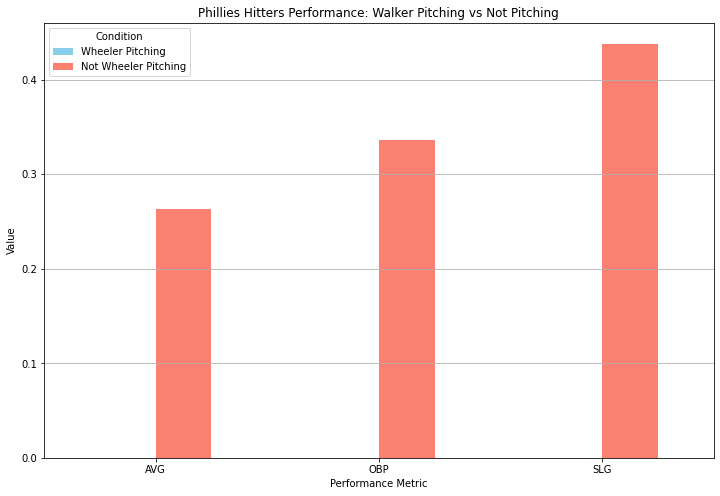

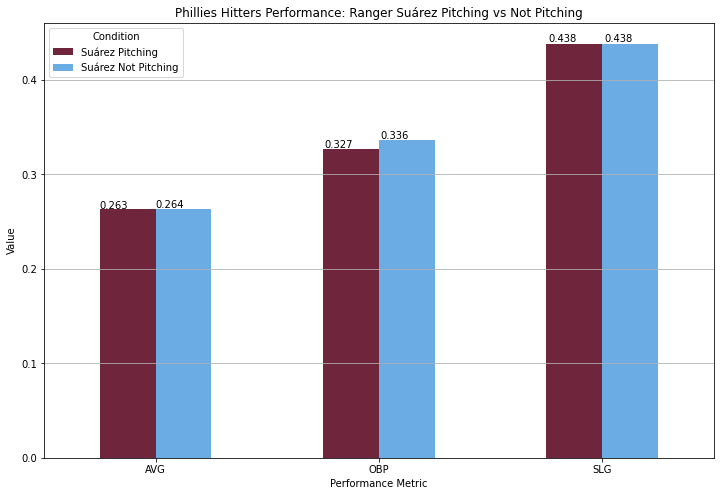

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the complete dataset
complete_file_path = 'C:/Users/RaymondCarpenter/Documents/GitHub/14thstreetanalytics/baseball/complete_statcast_data.csv'
complete_data = pd.read_csv(complete_file_path)

#Same code as above but for Ranger Suarez, after I changed var names to wheeler I started swapping pitcher names
complete_data['game_date'] = pd.to_datetime(complete_data['game_date'])


wheeler_game_ids_complete = complete_data[complete_data['player_name'] == 'Suárez, Ranger']['game_pk'].unique()


phillies_batter_ids = complete_data[(complete_data['home_team'] == 'PHI') | (complete_data['away_team'] == 'PHI')]['batter'].unique()


phillies_batters_wheeler_games_complete = complete_data[(complete_data['game_pk'].isin(wheeler_game_ids_complete)) & 
                                                       (complete_data['batter'].isin(phillies_batter_ids))]


phillies_batters_non_wheeler_games_complete = complete_data[(~complete_data['game_pk'].isin(wheeler_game_ids_complete)) & 
                                                           (complete_data['batter'].isin(phillies_batter_ids))]


def calculate_metrics(df):
    hits = df[df['events'].isin(['single', 'double', 'triple', 'home_run'])]
    total_bases = hits['events'].apply(lambda x: 1 if x == 'single' else 2 if x == 'double' else 3 if x == 'triple' else 4).sum()
    at_bats = df[df['events'].isin(['single', 'double', 'triple', 'home_run', 'strikeout', 'field_out'])].shape[0]
    walks = df[df['events'] == 'walk'].shape[0]
    hbp = df[df['events'] == 'hit_by_pitch'].shape[0]
    sac_flies = df[df['events'] == 'sac_fly'].shape[0]
    
    avg = hits.shape[0] / at_bats if at_bats > 0 else 0
    obp = (hits.shape[0] + walks + hbp) / (at_bats + walks + hbp + sac_flies) if (at_bats + walks + hbp + sac_flies) > 0 else 0
    slg = total_bases / at_bats if at_bats > 0 else 0
    
    return avg, obp, slg


avg_wheeler_games_complete, obp_wheeler_games_complete, slg_wheeler_games_complete = calculate_metrics(phillies_batters_walker_games_complete)


avg_non_wheeler_games_complete, obp_non_wheeler_games_complete, slg_non_wheeler_games_complete = calculate_metrics(phillies_batters_non_walker_games_complete)


metrics_comparison = pd.DataFrame({
    'Metric': ['AVG', 'OBP', 'SLG'],
    'Wheeler Pitching': [avg_wheeler_games_complete, obp_wheeler_games_complete, slg_wheeler_games_complete],
    'Not Wheeler Pitching': [avg_non_wheeler_games_complete, obp_non_wheeler_games_complete, slg_non_wheeler_games_complete]
}).set_index('Metric')


metrics_comparison.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'salmon'])
plt.title('Phillies Hitters Performance: Walker Pitching vs Not Pitching')
plt.xlabel('Performance Metric')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Condition')


plt.show()
import pandas as pd
import matplotlib.pyplot as plt


complete_file_path = 'C:/Users/RaymondCarpenter/Documents/GitHub/14thstreetanalytics/baseball/complete_statcast_data.csv'
complete_data = pd.read_csv(complete_file_path)


complete_data['game_date'] = pd.to_datetime(complete_data['game_date'])


walker_game_ids_complete = complete_data[complete_data['player_name'] == 'Suárez, Ranger']['game_pk'].unique()


phillies_batter_ids = complete_data[(complete_data['home_team'] == 'PHI') | (complete_data['away_team'] == 'PHI')]['batter'].unique()


phillies_batters_walker_games_complete = complete_data[(complete_data['game_pk'].isin(wheeler_game_ids_complete)) & 
                                                       (complete_data['batter'].isin(phillies_batter_ids))]


phillies_batters_non_walker_games_complete = complete_data[(~complete_data['game_pk'].isin(wheeler_game_ids_complete)) & 
                                                           (complete_data['batter'].isin(phillies_batter_ids))]


def calculate_metrics(df):
    hits = df[df['events'].isin(['single', 'double', 'triple', 'home_run'])]
    total_bases = hits['events'].apply(lambda x: 1 if x == 'single' else 2 if x == 'double' else 3 if x == 'triple' else 4).sum()
    at_bats = df[df['events'].isin(['single', 'double', 'triple', 'home_run', 'strikeout', 'field_out'])].shape[0]
    walks = df[df['events'] == 'walk'].shape[0]
    hbp = df[df['events'] == 'hit_by_pitch'].shape[0]
    sac_flies = df[df['events'] == 'sac_fly'].shape[0]
    
    avg = hits.shape[0] / at_bats if at_bats > 0 else 0
    obp = (hits.shape[0] + walks + hbp) / (at_bats + walks + hbp + sac_flies) if (at_bats + walks + hbp + sac_flies) > 0 else 0
    slg = total_bases / at_bats if at_bats > 0 else 0
    
    return avg, obp, slg


avg_wheeler_games_complete, obp_walker_games_complete, slg_wheeler_games_complete = calculate_metrics(phillies_batters_wheeler_games_complete)


avg_non_wheeler_games_complete, obp_non_walker_games_complete, slg_non_wheeler_games_complete = calculate_metrics(phillies_batters_non_wheeler_games_complete)


metrics_comparison = pd.DataFrame({
    'Metric': ['AVG', 'OBP', 'SLG'],
    'Suárez Pitching': [avg_walker_games_complete, obp_walker_games_complete, slg_walker_games_complete],
    'Suárez Not Pitching': [avg_non_walker_games_complete, obp_non_walker_games_complete, slg_non_walker_games_complete]
}).set_index('Metric')


ax = metrics_comparison.plot(kind='bar', figsize=(12, 8), color=['#6F263D', '#6BACE4'])
plt.title('Phillies Hitters Performance: Ranger Suárez Pitching vs Not Pitching')
plt.xlabel('Performance Metric')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Condition')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() * 1.005, p.get_height() * 1.005))


plt.show()


In [33]:
# Display the columns of the dataframe
df.columns


Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [39]:
from pybaseball import playerid_lookup

# find the ids of all players with last name Jones (returns 1,314 rows)
data = playerid_lookup('Harper')

# only return the ids of chipper jones (returns one row)
data = playerid_lookup('harper','bryce')

# Will return all players named Pedro Martinez (returns *2* rows)
data = playerid_lookup("stott", "bryson", fuzzy=True)

# Will return the 5 closest names to "yadi molina" (returns 5 rows)
# First row will be Yadier Molina
data = playerid_lookup("castellanos", "nick", fuzzy=True)